In [1]:
#Import Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Dataset shows the daily connections worldwide, from Apple users to maps services.
# Users were connecting while either driving, walking or using transportation, from 12-January-2020
# I filtered the content to extract data from 01-March-2020 till 30-April-2020 when the outbreak started

dataset = pd.read_csv('applemobilitytrends-2020-05-01.csv', usecols = list(range(0,3)) + list(range(52,114)))
dataset = dataset.rename (columns = {'geo_type':'state', 'Country/Region': 'region', "transportation_type":"transport"})
dataset["region"].replace('UK', 'United Kingdom', inplace=True)
dataset.head(10)

,state,region,transport,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,country/region,Albania,driving,100.43,89.25,91.02,89.72,94.87,102.82,109.92,...,31.69,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23
1,country/region,Albania,walking,78.42,94.88,95.65,91.13,94.46,103.80,92.92,...,35.39,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68
2,country/region,Argentina,driving,81.13,86.76,88.90,92.74,97.45,118.32,122.78,...,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69
3,country/region,Argentina,walking,68.50,101.01,104.39,108.23,113.92,126.70,112.81,...,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62
4,country/region,Australia,driving,97.35,99.14,101.63,106.02,113.97,113.49,93.23,...,59.69,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40
5,country/region,Australia,transit,113.58,115.04,112.26,111.17,113.82,112.67,98.27,...,22.49,23.78,20.96,19.06,22.74,23.80,23.76,22.35,23.58,23.52
6,country/region,Australia,walking,100.94,101.73,101.17,97.93,111.79,126.09,108.98,...,47.17,51.03,46.68,39.30,45.09,46.07,44.06,41.71,44.69,46.44
7,country/region,Austria,driving,106.13,103.21,104.24,111.11,111.25,123.46,121.17,...,60.21,60.76,57.52,50.31,57.18,60.96,62.63,62.29,64.44,61.20
8,country/region,Austria,walking,98.99,111.80,110.27,112.82,120.92,133.87,136.39,...,47.59,48.07,44.41,43.01,48.66,44.67,47.74,40.06,46.55,46.62
9,country/region,Belgium,driving,103.95,107.71,108.25,115.66,118.33,127.52,129.93,...,54.36,54.25,52.29,49.02,49.02,52.77,51.69,54.59,54.06,48.03


In [3]:
# Next, I will filter by Country/Region because data granularity reaches until cities but the 
# other Dataset, "covid_cases", shows data just at National Level. Also will take the data for those using
# Apple phones while walking because not all the countries shows respective data for the other 2 
# categories (driving - transit) and it is more likely to get infected while walking rather than driving.
# Also I will stick to those countries with higher cases: Spain, United Kingdom and USA.

dataset = dataset[(dataset.state=="country/region") & (dataset.transport=="walking")]
dataset = dataset.drop(["state", "transport"], axis = 1)
new_rows = dataset['region'].str.contains('United Kingdom') | dataset['region'].str.contains('United States') | dataset['region'].str.contains('Spain') 
d1 = dataset[new_rows]
d1.head(5)

,region,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
125,Spain,125.56,112.98,114.03,120.37,130.01,157.84,178.42,123.06,108.59,...,13.93,17.73,16.94,19.26,19.50,18.56,18.77,18.22,30.01,32.00
141,United Kingdom,105.44,107.54,114.84,116.67,110.07,144.51,172.59,101.39,100.87,...,46.54,46.36,49.85,49.52,44.12,41.46,35.33,37.80,37.29,44.94
148,United States,102.29,99.20,104.76,104.61,111.67,133.94,155.70,107.77,105.33,...,52.86,52.92,58.89,60.00,45.95,54.93,57.61,56.67,57.81,69.58


In [4]:
# Now, I will load the second dataset, "timeseries_Covid19_confirmed" which collects data about the daily
# progress of infected worldwide since January 2020. 
# Important: Data shown in this dataset is cumulative, so each day new cases will be added to previous total
dataset2 = pd.read_csv('timeseries_Covid19_confirmed.csv', usecols = list(range(0,4)) + list(range(43,105)))
dataset2 = dataset2.rename (columns = {'Province/State':'state', 'Country/Region': 'region', "5/2/20": "total_cases"})
dataset2["region"].replace('US', 'United States', inplace=True)
dataset2 = dataset2[(dataset2.state=="Country")]
dataset2.head(10)

,state,region,Lat,Long,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,Country,Afghanistan,33.0000,65.0000,1,1,1,1,1,1,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,Country,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,Country,Algeria,28.0339,1.6596,1,3,5,12,12,17,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,Country,Andorra,42.5063,1.5218,0,1,1,1,1,1,...,723,723,731,738,738,743,743,743,745,745
4,Country,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30
5,Country,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,25
6,Country,Argentina,-38.4161,-63.6167,0,0,1,1,1,2,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532
7,Country,Armenia,40.0691,45.0382,1,1,1,1,1,1,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148
16,Country,Austria,47.5162,14.5501,14,18,21,29,41,55,...,14925,15002,15071,15148,15225,15274,15357,15402,15452,15531
17,Country,Azerbaijan,40.1431,47.5769,3,3,3,3,6,6,...,1518,1548,1592,1617,1645,1678,1717,1766,1804,1854


In [5]:
# Following same criteria as before, just by Country level, selecting Italy, Spain, UK and USA.  
# Also, I will pick dates starting from 01-March-2020 till 01-May-2020.
new_subs = dataset2['region'].str.contains('United States') | dataset2['region'].str.contains('United Kingdom')  | dataset2['region'].str.contains('Spain')  
d2 = dataset2[new_subs]
d2 = d2.drop(["state"], axis = 1)
d2.head(5)

,region,Lat,Long,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
201,Spain,40.0000,-4.0000,84,120,165,222,259,400,500,...,208389,213024,202990,205905,207634,209465,210773,212917,213435,213435
223,United Kingdom,55.3781,-3.4360,36,40,51,85,115,163,206,...,133495,138078,143464,148377,152840,157149,161145,165221,171253,177454
225,United States,37.0902,-95.7129,74,98,118,149,217,262,402,...,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461


In [6]:
# Now, I will store the information for each country, on a single dataset, the data for Apple 
# Connections and Covid Cases, since 01-March-2020 till 01-May-2020.

ranges = pd.date_range('03/01/2020', periods=62)
Apple_Spain = d1.iloc[0,1:63].values
Covid_Spain = d2.iloc[0,3:65].values
Apple_UK = d1.iloc[1,1:63].values
Covid_UK = d2.iloc[1,3:65].values
Apple_USA = d1.iloc[2,1:63].values
Covid_USA = d2.iloc[2,3:65].values

In [7]:
# Before merging each pair on the same dataset, Covid cases are represented as cumulative values, which 
# makes difficult to appreciate the daily increment, and when plotting, will be showing a continuous line
# so I will transform it, so obtain, per day, just the new number of cases, instead of the cumulative total
# First, will be applied to Spain

spa_x = Covid_Spain
spa_y = []
for i in range(0,62):
    if (i == 0):
        spa_y.append(spa_x[i])
    else:
        spa_y.append(spa_x[i] - Covid_Spain[i-1])


Spain = pd.DataFrame({'Apple_Connections':Apple_Spain, 'Covid_Cases':spa_y}, index=ranges )
Spain.head(10)


,Apple_Connections,Covid_Cases
2020-03-01,125.56,84
2020-03-02,112.98,36
2020-03-03,114.03,45
2020-03-04,120.37,57
2020-03-05,130.01,37
2020-03-06,157.84,141
2020-03-07,178.42,100
2020-03-08,123.06,173
2020-03-09,108.59,400
2020-03-10,104.81,622


In [8]:
# UK 

UK_x = Covid_UK
UK_y = []
for i in range(0,62):
    if (i == 0):
        UK_y.append(UK_x[i])
    else:
        UK_y.append(UK_x[i] - Covid_UK[i-1])



UK = pd.DataFrame({'Apple_Connections':Apple_UK, 'Covid_Cases':UK_y}, index=ranges )
UK.head(10)


,Apple_Connections,Covid_Cases
2020-03-01,105.44,36
2020-03-02,107.54,4
2020-03-03,114.84,11
2020-03-04,116.67,34
2020-03-05,110.07,30
2020-03-06,144.51,48
2020-03-07,172.59,43
2020-03-08,101.39,67
2020-03-09,100.87,48
2020-03-10,108.28,61


In [9]:
# And finally USA
USA_x = Covid_USA
USA_y = []
for i in range(0,62):
    if (i == 0):
        USA_y.append(USA_x[i])
    else:
        USA_y.append(USA_x[i] - Covid_USA[i-1])



USA = pd.DataFrame({'Apple_Connections':Apple_USA, 'Covid_Cases':USA_y}, index=ranges )
USA.head(10)


,Apple_Connections,Covid_Cases
2020-03-01,102.29,74
2020-03-02,99.2,24
2020-03-03,104.76,20
2020-03-04,104.61,31
2020-03-05,111.67,68
2020-03-06,133.94,45
2020-03-07,155.7,140
2020-03-08,107.77,116
2020-03-09,105.33,65
2020-03-10,103.06,376


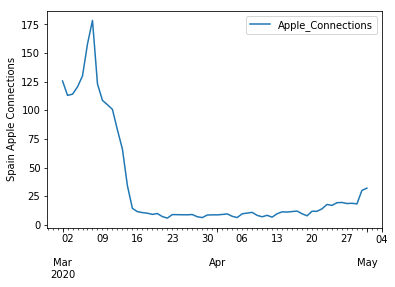

In [10]:
# Now it's time to plot the results. I want to emphasize is the fact that, based on the fall of phone usage
# (Apple connections to map service while walking), it can be easily infered when the lockdown started
# on each country. 
Spain.loc['2020-03-01':'2020-05-01', ['Apple_Connections']].plot()
plt.ylabel('Spain Apple Connections')
plt.show()


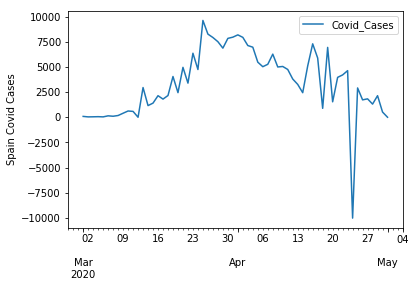

In [11]:
# This plot shows that around 14th of March (when it really happened), Apple Connections plummeted, 
# as a result of the start of Spanish lockdown. Now number of Covid positive cases will be presented in 
# those same dates

        
Spain.loc['2020-03-01':'2020-05-01', ['Covid_Cases']].plot()
plt.ylabel('Spain Covid Cases')
plt.show()

# After analyzing both graphs, it can be said that there is a correlation between number of Covid cases, 
# and Apple Connections, becahse when they reached its peak, positive cases were too low, but given the 
# virus takes around 2 weeks until its symptoms manifest, on Spanish case, will put us by early April, 
# when the plot shows Covid cases skyrocketing

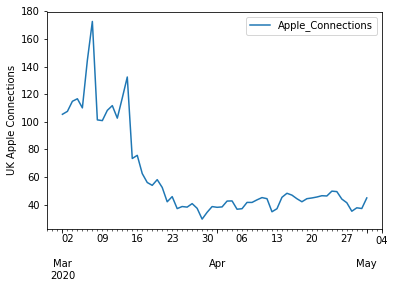

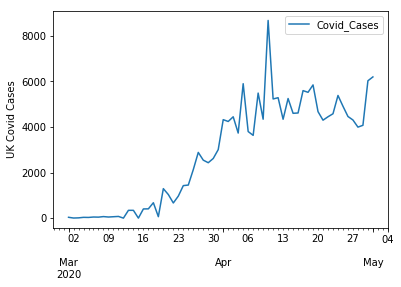

In [12]:
# Similar conclusion can be drawn out from UK graphs

UK.loc['2020-03-01':'2020-05-01', ['Apple_Connections']].plot()
plt.ylabel('UK Apple Connections')
plt.show()

UK.loc['2020-03-01':'2020-05-01', ['Covid_Cases']].plot()
plt.ylabel('UK Covid Cases')
plt.show()

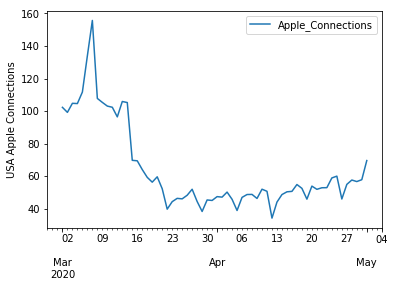

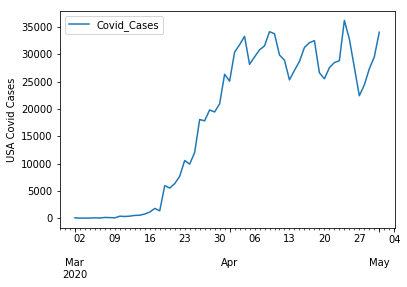

In [13]:
# And similar situation in the US, which started to suffer the pandemy a bit later than Europe but with 
# more dramatical consequences.

USA.loc['2020-03-01':'2020-05-01', ['Apple_Connections']].plot()
plt.ylabel('USA Apple Connections')
plt.show()
       
USA.loc['2020-03-01':'2020-05-01', ['Covid_Cases']].plot()
plt.ylabel('USA Covid Cases')
plt.show()